$\large\textbf{Exercise 2: Line Search}$

$\large\text{In this exercise, we will design a procedure to find a suitable step length. We consider the following algorithm:}$

We will use this idea to construct a suitable step length finding procedure for our modified algorithm given below: 


\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

$\large\textbf{1.}$ Write the function $f(\mathbf{x})$ in the form $\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{x}\in {\mathbb{R}}^2$, $\mathbf{A}$ is a symmetric matrix of size $2 \times 2$, $\mathbf{b}\in{\mathbb{R}}^2$ and $c\in\mathbb{R}$. 

$\large\textbf{ANS:}$


           
 :    $\mathbf{f(x)}= \begin{bmatrix} x_1&
x_2\\ \end{bmatrix} \begin{bmatrix}1&0\\0&1\end{bmatrix}\begin{bmatrix}x_1\\x_2\end{bmatrix}+2\begin{bmatrix}-10&4\end{bmatrix}\begin{bmatrix}x_1\\x_2\end{bmatrix}+104$

$\large\textbf{2.}$ It turns out that for a function $f:{\mathbb{R}}^n\rightarrow \mathbb{R}$ of the form $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{A}\in{\mathbb{R}}^{n \times n}$ is a symmetric matrix, $\mathbf{b} \in {\mathbb{R}}^n$ and $c\in \mathbb{R}$, the analytical solution to $\min_{\alpha \geq 0} f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ can be found in closed form. Find the solution. 

$\large\textbf{ANS:}$

$\alpha^{*}=\frac{(\nabla f(x_k))^{T}\nabla f(x_k)}{(\nabla f(x_k))^{T}Q\nabla f(x_k)}$

$\large\textbf{3.}$ Use the answers to Questions 1 and 2 to design a procedure to compute the step length $\eta^k$
in Algorithm 2 for the function   $f(\mathbf{x})=f(x_1,x_2)= (x_1-10)^2 + (x_2+2)^2$
. Implement the procedure as a Python function
(complete the code in compute steplength module in the notebook).

In [ ]:
import numpy as np

In [ ]:
def evalf(x):   
  assert type(x) is np.ndarray and len(x) == 2 
  return (x[0]-10)**2 + (x[1]+2)**2

In [ ]:
def evalg(x):  
  assert type(x) is np.ndarray and len(x) == 2 
  return np.array([2*(x[0]-10),2*(x[1]+2)])

In [ ]:
def compute_steplength(x):
  A=np.identity(2) 
  m = evalg(x)
  tm = np.matrix.transpose(m)
  step_length = np.matmul(tm,m)/(2*np.matmul(np.matmul(tm,A),m))
  return step_length

$\large\textbf{4.}$ With starting point $x^0$ = (0, 0) and the new module to compute $η^k$
, try $\tau$ = $10^{−p}$ where p = 1, 2, . . . , 12.
For each $\tau$ , record the number of iterations taken by the algorithm to terminate. Prepare a plot where the number of iterations is plotted against $\tau$ values. Compare and contrast the plot with the plots obtained in Exercise 1 with fixed step length values.

In [ ]:
def find_minimizer(start_x, tol):
  assert type(start_x) is np.ndarray and len(start_x) == 2  
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  k = 0
  fvals = [evalf(x)]
  while (np.linalg.norm(g_x) > tol): 
    step_length = compute_steplength(x) 
    x = np.subtract(x, np.multiply(step_length,g_x)) 
    k += 1 
    g_x = evalg(x) 
  return x ,evalf(x),k

In [ ]:
p=[1,2,3,4,5,6,7,8,9,10,11,12]
iterations=[]
tolerance = []
start_x = np.array([0,0])
for i in p:
  my_tol=(10)**(-i)
  step_length=compute_steplength(start_x)
  opt_x, fvals_ret, k= find_minimizer(start_x,my_tol)
  iterations.append(k)
  tolerance.append(my_tol)


$\large\textbf{Now Prepare a plot where the number of iterations is plotted against  $\tau$ values}$

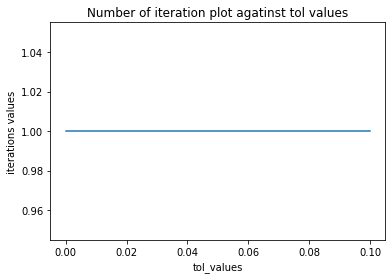

In [ ]:
plt.plot(tolerance, iterations)
plt.xlabel('tol_values')
plt.ylabel('iterations values')
plt.title('Number of iteration plot agatinst tol values')
plt.show()